In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.models.train_model import *
from src.visualization.vis_data import *
import seaborn as sns
output_notebook()
plt.rcParams.update({'font.size': 14})

Loading BokehJS ...

# Traffice 2020

In [36]:
t_folder = '../data/traffic/'
t_files = glob(t_folder + '*.csv')

In [42]:
trf = pd.read_csv(t_files[0])
trf = trf.iloc[:,1:]
trf.columns = ['date', 'max', 'mean']
 # extract months and date 
trf['month'] = trf['date'].str.extract('(\D+)').iloc[:,0]
trf['day'] = trf['date'].str.extract('(\d+)').iloc[:,0]
month_list = s.unique().tolist()

,date,max,mean
0,1มกราคม,3.7,2.1
1,2มกราคม,5.5,2.7


In [60]:
month_dict = {}
for i, m in enumerate(month_list):
    i += 1
    if len(str(i))==1:
        month_dict[m] = '-0'+str(i)
    else:
        month_dict[m] = str(i)
        
print(month_dict)

{'มกราคม': '-01', 'กุมภาพันธ์': '-02', 'มีนาคม': '-03', 'เมษายน': '-04', 'พฤษภาคม': '-05', 'มิถุนายน': '-06', 'กรกฎาคม': '-07', 'สิงหาคม': '-08'}


In [78]:
# change month to number 
trf['month'] = trf['month'].replace(month_dict)

# combine month, date into one strings
date_list = []
for i, row in trf.iterrows():
    if len(row['day']) == 1:
        day = '-0' + row['day']
    else:
        day = '-' + row['day']
    new_date = '2020'+row['month'] + day
    date_list.append(new_date)
    
trf['date'] = pd.to_datetime(date_list)
trf = trf[['date','max','mean']]

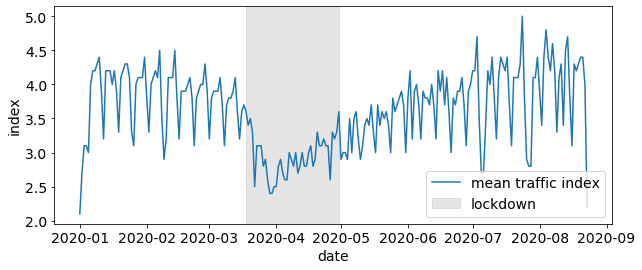

In [103]:
_, ax = plt.subplots(figsize=(10,4))
ax.plot(trf['date'], trf['mean'], label='mean traffic index')


#ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
ax.axvspan(datetime(2020, 3, 18), datetime(2020, 4, 30), color='gray', alpha=0.2, label='lockdown' )
ax.set_xlabel('date')
ax.set_ylabel('index')
ax.legend(loc='lower right')

# BKK Data 

In [110]:
# start building dataset from scratch only perform this when new data files are added 
dataset = Dataset('Bangkok')
dataset.build_all_data( build_fire=True, build_holiday = True)

save file ../data/bangkok/02t.csv
save file ../data/bangkok/03t.csv
save file ../data/bangkok/05t.csv
save file ../data/bangkok/11t.csv
save file ../data/bangkok/12t.csv
save file ../data/bangkok/50t.csv
save file ../data/bangkok/52t.csv
save file ../data/bangkok/53t.csv
save file ../data/bangkok/59t.csv
save file ../data/bangkok/61t.csv
Averaging data from 11 stations
Loading all hotspots data. This might take sometimes
before drop (3168630, 18)
after drop (3064842, 10)


In [2]:
# reinit the data and load saved process data 
dataset = Dataset('Bangkok')
dataset.load_()
# merge pollution data with other data except fire
dataset.feature_no_fire()

data no fire has shape (52715, 14)


Index(['PM2.5', 'PM10', 'O3', 'CO', 'NO2', 'SO2'], dtype='object')


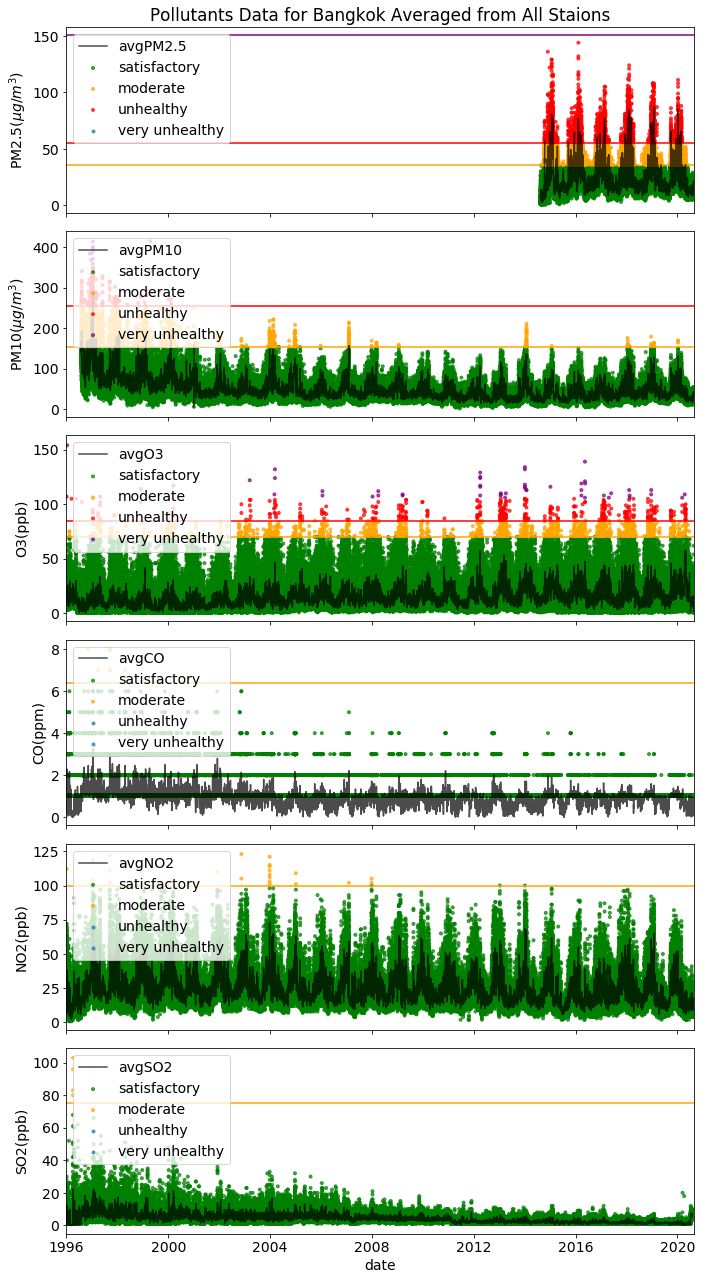

In [172]:
# plot the raw data
plot_all_pollutions(dataset.poll_df, city_name=dataset.city_name)

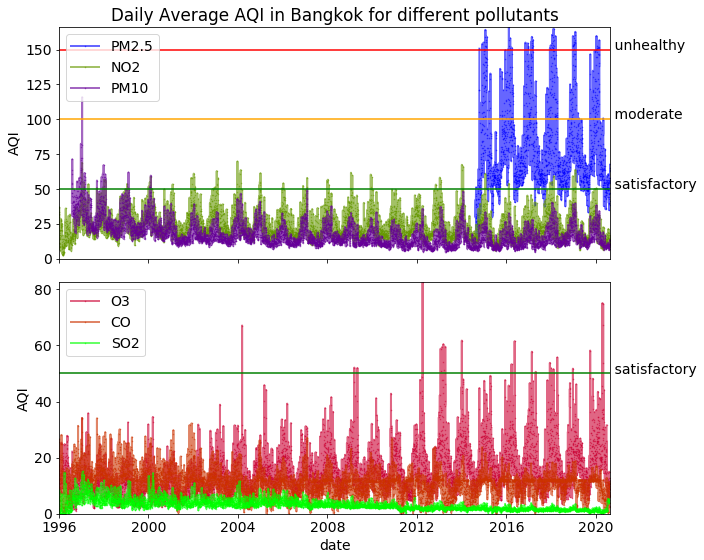

In [173]:
plot_polls_aqi(dataset.poll_df.copy(), dataset.roll_dict, dataset.city_name, filename=dataset.report_folder + 'all_pol_aqi.png' )

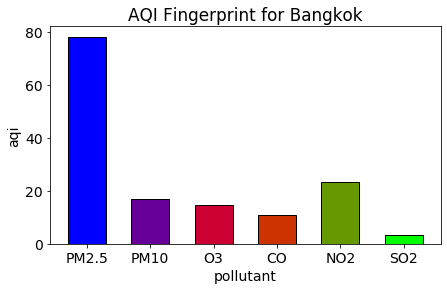

In [174]:
plot_chem_print(poll_to_aqi(dataset.poll_df.copy(), dataset.roll_dict).mean(axis=0), dataset.city_name, filename=dataset.report_folder + 'fingerprint.png')

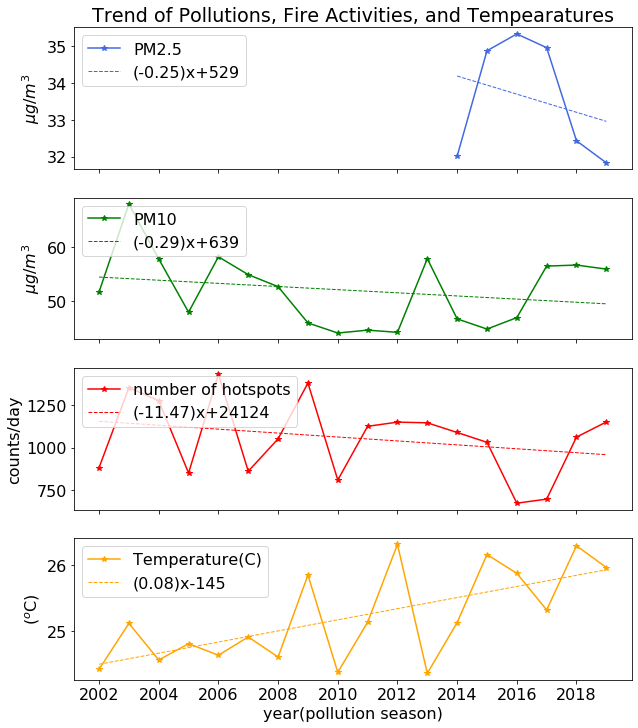

In [331]:
ax, year_avg = plot_yearly_ln(dataset, filename=dataset.report_folder + 'compare_ln_trends.png')

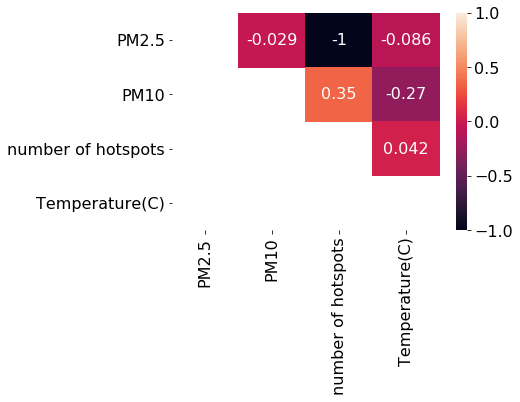

In [332]:
plot_corr(year_avg, figsize=(6,4))

aqi 100 in  11-05 to 03-28


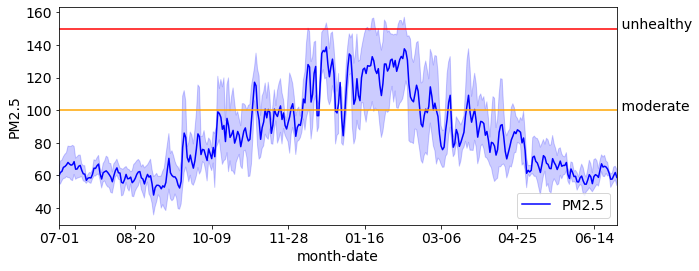

In [335]:
plot_season_aqi(dataset.poll_df.copy(), dataset.roll_dict, 'PM2.5', filename=dataset.report_folder + 'seasonal_pattern_PM25.png')

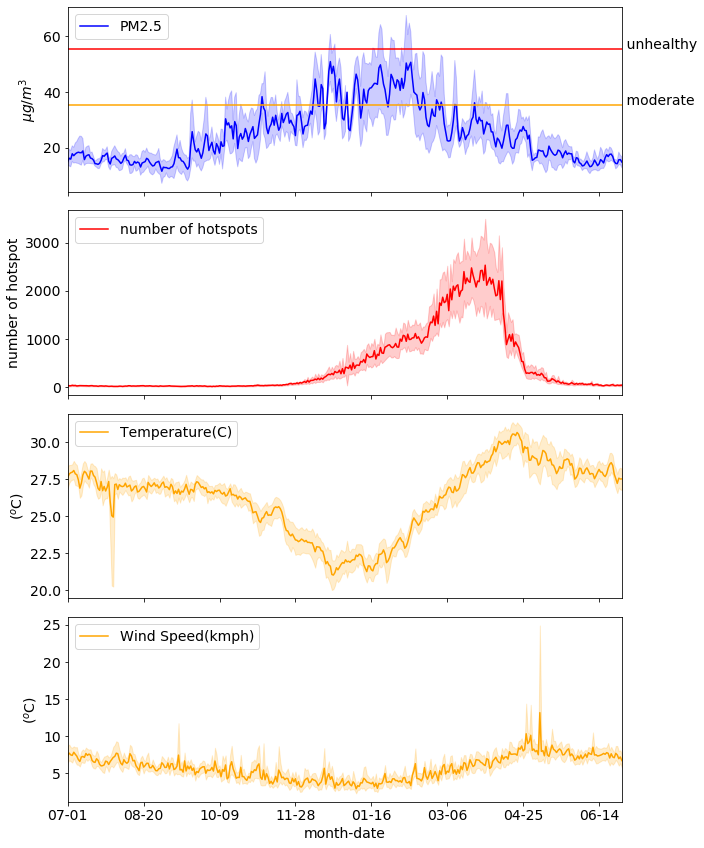

In [346]:
compare_seson_avg(dataset, agg='mean')
ax[3].set_ylim([0,15])

plt.savefig(dataset.report_folder + 'fire_PM25_season.png')

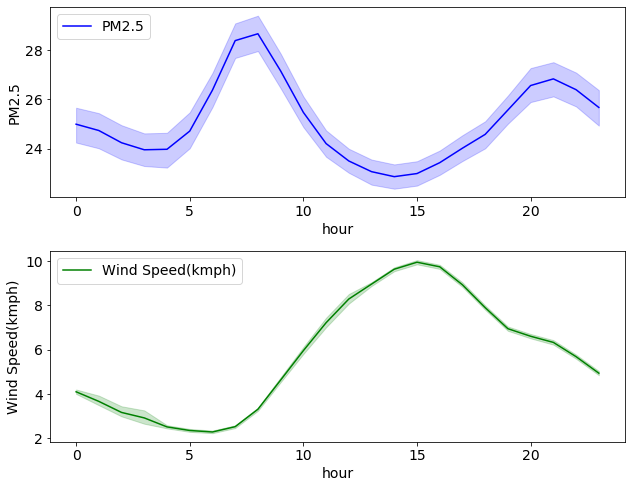

In [19]:
_, ax = plt.subplots(2, 1, figsize=(9, 7))
plot_hour_avg(dataset.poll_df.copy(), 'PM2.5', ax[0],  color='blue')
plot_hour_avg(dataset.wea.copy(), 'Wind Speed(kmph)', ax[1],  color='green')
plt.tight_layout()

In [35]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_power_stations_in_Vietnam#For_gas,_coal-fired_power_plants')

In [36]:
label_list = ['coal','gas','solar', 'wind', 'biomass', 'hydroelectricity']

In [54]:
power_plants = []
for df, label in zip(dfs, label_list): 
    df['type'] = label
    power_plants.append(df)
    
power_plants= pd.concat(power_plants)

In [55]:
power_plants['Status'] = power_plants['Status'].fillna(power_plants['Unnamed: 7'])
#power_plants['Capacity (MW)'] = power_plants['Capacity (MW)'].fillna(power_plants['Capacity (MWp)'])

In [56]:
power_plants.to_csv('C:/Users/Benny/Documents/Fern/aqi_thailand2/data/hanoi/power_plants.csv',index=False)

In [53]:
power_plants[~power_plants['Unnamed: 7'].isna()] 

,Station,Province,Capacity (MW),Commission date,Sponsor/Owner,Status,Note,Ref,type,Location,Capacity (MWp),Construction Start Date,COD date,Source,Unnamed: 7,Plant name,Operation time,Technology,Fuel type,Commission time
9,Trung Nam Ninh Thuan phase 2,Ninh Thuan,NaN,NaN,Trungnam Wind Power JSC,Under Construction,"ENERCON turbines, Siemens Inverter",NaN,wind,"Loi Hai and Bac Phong communes, Thuan Bac dist...",64.0,NaN,NaN,[165][166],Under Construction,NaN,NaN,NaN,NaN,NaN
10,Dai Phong wind farm,Binh Thuan,NaN,NaN,AC Energy+Blue Circle,Under Construction,AC Energy accounts for over 62% of the economi...,NaN,wind,"Thien Nghiep commune, Mui Ne ward, Phan Thiet ...",40.0,NaN,NaN,[167],Under Construction,NaN,NaN,NaN,NaN,NaN
11,Bac Lieu phase III (VN version),Bac Lieu,NaN,NaN,Super Wind Energy Cong Ly 1 JSC,Under Construction,Super Wind Energy Cong Ly 1 JSC = Cong Ly + Th...,NaN,wind,"Vinh Trach Dong commune, Bac Lieu city",142.0,30/01/2018,NaN,[168],Under Construction,NaN,NaN,NaN,NaN,NaN
12,Cong Ly (3 phase) (VN version),Soc Trang,NaN,NaN,Super Wind Energy Cong Ly 1 JSC,Under Construction,15x2MW units.,NaN,wind,"Lai Hoa commune, Vinh Chau district, Soc Trang",90.0,30/01/2018,NaN,[169],Under Construction,NaN,NaN,NaN,NaN,NaN
13,Lac Hoa 1,Soc Trang,NaN,NaN,Hoang Son Energy,Under Construction,NaN,NaN,wind,"Lac Hoa commune, Vinh Chau district, Soc Trang",30.0,NaN,NaN,[170],Under Construction,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Dak Po wind farm,Gia Lai,NaN,NaN,Mirat Energy + HLP,Approved,NaN,NaN,wind,"Dak Po district, Gia Lai province",200.0,NaN,NaN,[192],Approved,NaN,NaN,NaN,NaN,NaN
68,Mang Yang wind farm,Gia Lai,NaN,NaN,Mirat Energy + HLP,Approved,NaN,NaN,wind,"Mang Yang district, Gia Lai province",200.0,NaN,NaN,[192],Approved,NaN,NaN,NaN,NaN,NaN
69,Thai Hoa,Binh Thuan,NaN,NaN,Pacific Energy - Binh Thuan JSC,Approved,Metmast installed,NaN,wind,"Hoa Thang commune, Bac Binh district, Binh Thu...",82.5,NaN,NaN,[193],Approved,NaN,NaN,NaN,NaN,NaN
70,Thai Phong,Binh Thuan,NaN,NaN,Pacific Energy - Binh Thuan JSC,Approved,Metmast installed,NaN,wind,"Chi Cong, Hoa Minh and Phong Phu communes, Tuy...",52.5,NaN,NaN,[193],Approved,NaN,NaN,NaN,NaN,NaN


In [47]:
power_plants.dropna(axis=1,how='all')

,Station,Province,Capacity (MW),Commission date,Sponsor/Owner,Status,Note,Ref,type,Location,Capacity (MWp),Construction Start Date,COD date,Source,Unnamed: 7,Plant name,Operation time,Technology,Fuel type,Commission time
0,An Khanh 1 (Khanh Hoa power station),Thai Nguyen,2x58,2015,An Khanh Electricity JSC,Operating,NaN,[4],coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cam Pha Phase I-II,Quang Ninh,2x340,2011,VINACOMIN,Operating,NaN,[5],coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cao Ngan,Thai Nguyen,2x57.5,2006,VINACOMIN,Operating,NaN,[6],coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dong Nai Formosa Unit 1-2,Dong Nai,2x150,2004,Hung Nghiep Formosa,Operating,NaN,[7],coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dong Nai Formosa Unit 3,Dong Nai,150,2018,Hung Nghiep Formosa,Operating,NaN,[8],coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Hoa Binh expansion,NaN,2x240,NaN,EVN,NaN,Under construction or proposed,Report 58/BC-CBT annex row I.21,hydroelectricity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0
102,Ialy expansion,NaN,2x180,NaN,EVN,NaN,Under construction or proposed,Report 58/BC-CBT annex row I.22,hydroelectricity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0
103,Tri An expansion,NaN,200,NaN,EVN,NaN,Under construction or proposed,Report 58/BC-CBT annex row I.23,hydroelectricity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025.0
104,My Ly,NaN,250,NaN,IPP,NaN,Under construction or proposed,Report 58/BC-CBT annex row V.5,hydroelectricity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0


In [46]:
power_plants[(power_plants['type']=='gas') & (power_plants['Status']=='Operating')] 

,Station,Province,Capacity (MW),Commission date,Sponsor/Owner,Status,Note,Ref,type,Location,Capacity (MWp),Construction Start Date,COD date,Source,Unnamed: 7,Plant name,Operation time,Technology,Fuel type,Commission time
0,Ca Mau 1&2 gas power plant,Ca Mau,2x750,2008,PetroVietnam Power Ca Mau,Operating,NaN,[45] and decision 125/QD-DTDL annex 3 row 22-23,gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nhon Trach 1 gas power plant,Dong Nai,450,2009,PetroVietnam Power Nhon Trach,Operating,NaN,[46],gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nhon Trach 2 Combined Cycle Gas Turbine Plant,Dong Nai,750,2011,PetroVietnam Power Nhon Trach 2,Operating,NaN,[47],gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Phu My 2.1,Vung Tau,477,1997,"Phu My Thermal Power Company, GENCO3",Operating,NaN,[48] and Decision 125/QD-DTDL annex 1 row 15,gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ba Ria,Vung Tau,340,1992-2002,"Ba Ria Thermal Power Company, GENCO 3",Operating,NaN,[49] and Decision 125/QD-DTDL annex 3 row 21,gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Phu My 2.1 extension,Vung Tau,468,1999,"Phu My Thermal Power Company, GENCO 3",Operating,NaN,[50] and Decision 125/QD-DTDL annex 1 row 15,gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Phu My 4,Vung Tau,477,2004,"Phu My Thermal Power Company, GENCO 3",Operating,NaN,[50] and Decision 125/QD-DTDL annex 1 row 16,gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,O Mon,Can Tho,2x330,2009-2015,EVNGENCO2,Operating,NaN,[51][52],gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Phu My 1,Vung Tau,1118,2001,"Phu My Thermal Power Company, GENCO 3",Operating,NaN,[53][50] and Decision 125/QD-DTDL annex 1 row 14,gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Phu My 3,Vung Tau,720,2004,"Phu My 3 Bot Power Company LTD, BP Holdings BV...",Operating,NaN,[54][55] and Decision 125/QD-DTDL annex 3 row 18,gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df2 = pd.read_html('https://en.wikipedia.org/wiki/List_of_gas_power_plants_in_Vietnam')[0]
df2.head()

,Power plants,Other names,Sponsors,Capacity (MW),Status,Province,Commission date,Source,Note
0,O Mon III Combined Cycle Gas Turbine Plant,NaN,EVN (ODA),1x750,pre-permit/permitted,Can Tho,2025,MOIT Report 58/BC-CBT annex row I.13,NaN
1,O Mon IV Combined Cycle Gas Turbine Plant,NaN,EVN,1x750,pre-permit/permitted,Can Tho,2023,MOIT Report 58/BC-CBT annex row I.14,NaN
2,Dung Quat I Combined Cycle Gas Turbine Plant,NaN,EVN,750,pre-permit/permitted,Quang Ngai,2024,MOIT Report 58/BC-CBT annex row I.19,NaN
3,Dung Quat III Combined Cycle Gas Turbine Plant,NaN,EVN,750,pre-permit/permitted,Quang Ngai,2025,MOIT Report 58/BC-CBT annex row I.20,NaN
4,Nhon Trach 3&4 Combined Cycle Gas Turbine Plant,NaN,PVN,2x750,pre-permit/permitted,Dong Nai,2023-2024,MOIT Report 58/BC-CBT annex row II.5,NaN


In [45]:
df2[df2['Status']=='operating'] 

,Power plants,Other names,Sponsors,Capacity (MW),Status,Province,Commission date,Source,Note
12,Ca Mau 1&2 gas power plant,NaN,PetroVietnam Power Ca Mau,2x750,operating,Ca Mau,2008,[6] and decision 125/QD-DTDL annex 3 row 22-23,NaN
13,Nhon Trach 1 gas power plant,NaN,PetroVietnam Power Nhon Trach,450,operating,Dong Nai,2009,[7],NaN
14,Nhon Trach 2 Combined Cycle Gas Turbine Plant,NaN,PetroVietnam Power Nhon Trach 2,750,operating,Dong Nai,2011,[8],NaN
16,Phu My 2.1,NaN,"Phu My Thermal Power Company, GENCO3",477,operating,Vung Tau,1997,[10] and Decision 125/QD-DTDL annex 1 row 15,NaN
17,Ba Ria,NaN,"Ba Ria Thermal Power Company, GENCO 3",340,operating,Vung Tau,1992-2002,[11] and Decision 125/QD-DTDL annex 3 row 21,NaN
18,Phu My 2.1 extension,NaN,"Phu My Thermal Power Company, GENCO 3",468,operating,Vung Tau,1999,[12] and Decision 125/QD-DTDL annex 1 row 15,NaN
19,Phu My 4,NaN,"Phu My Thermal Power Company, GENCO 3",477,operating,Vung Tau,2004,[12] and Decision 125/QD-DTDL annex 1 row 16,NaN
22,O Mon,NaN,EVNGENCO2,2x330,operating,Can Tho,2009-2015,[15][16],NaN
23,Phu My 1,NaN,"Phu My Thermal Power Company, GENCO 3",1118,operating,Vung Tau,2001,[12][17] and Decision 125/QD-DTDL annex 1 row 14,NaN
24,Phu My 3,NaN,"Phu My 3 Bot Power Company LTD, BP Holdings BV...",720,operating,Vung Tau,2004,[18][19] and Decision 125/QD-DTDL annex 3 row 18,NaN
